In [1]:
import pandas as pd
import requests
import os

In [ ]:
# --- Configuration ---
# The URL for the NCBI all nucleotide metadata file
metadata_url = "https://ftp.ncbi.nlm.nih.gov/genomes/Viruses/AllNuclMetadata/AllNuclMetadata.csv.gz"

# Define where to save the downloaded file using standard strings
download_dir = "influenza_data_exploration"
local_filepath = os.path.join(download_dir, "AllNuclMetadata.csv.gz")

# --- Step 1: Download the Data ---
# We'll check if the file already exists to avoid re-downloading it every time.
if not os.path.exists(local_filepath):
    print(f"Downloading data from: {metadata_url}")
    print(f"This may take a while depending on your network speed...")
    try:
        # Create the directory if it doesn't exist
        os.makedirs(download_dir, exist_ok=True)
        
        with requests.get(metadata_url, stream=True) as r:
            r.raise_for_status() # Will raise an error for bad status codes (4xx or 5xx)
            with open(local_filepath, 'wb') as f:
                # Download in chunks for large files
                for chunk in r.iter_content(chunk_size=8192): 
                    f.write(chunk)
        print(f"Download complete. File saved to: {local_filepath}")
    except Exception as e:
        print(f"An error occurred during download: {e}")
else:
    print(f"File already exists at: {local_filepath}. Skipping download.")

This may take a while depending on your network speed...
Download complete. File saved to: influenza_data_exploration/AllNuclMetadata.csv.gz


In [4]:
# In a new notebook cell:
!gunzip influenza_data_exploration/AllNuclMetadata.csv.gz

In [2]:
# load influenza_data_exploration/AllNuclMetadata.csv
# --- Step 2: Load the Data ---
df = pd.read_csv("influenza_data_exploration/AllNuclMetadata.csv")
df.head() 

/tmp/ipykernel_3879225/2920881160.py:3: DtypeWarning: Columns (1,2,4,5,13,14,17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("influenza_data_exploration/AllNuclMetadata.csv")


,#Accession,SRA_Accession,Submitters,Release_Date,Strain,Isolate,Species,Genus,Family,Molecule_type,...,Genotype,Segment,Publications,Geo_Location,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NC_108342.1,NaN,"Subramanyam,B., Soundarya,J., Selvaraj,A., Tam...",2025-07-15,NaN,NaN,Bahkauvirus chedec,Bahkauvirus,Salasmaviridae,dsDNA,...,NaN,NaN,NaN,India: Chennai,NaN,Bacillus subtilis,NaN,2004-07-15,NaN,"Bacillus phage Chedec 11, complete genome"
1,NC_108593.1,NaN,"Xie,Z., Yang,M.",2025-07-15,NaN,NaN,Gaunavirus syybuna,Gaunavirus,Salasmaviridae,dsDNA,...,NaN,NaN,NaN,China,NaN,Lysinibacillus fusiformis,NaN,2022-06,NaN,"Bacillus phage vB_BaeroP_SYYB1, complete genome"
2,NC_111368.1,NaN,"Yang,M., Tan,S.",2025-07-15,NaN,NaN,Layangcvirus LY3,Layangcvirus,Salasmaviridae,dsDNA,...,NaN,NaN,NaN,China,NaN,Bacillus cereus,NaN,2022-04-14,NaN,"Bacillus phage vB_BceP_LY3, complete genome"
3,NC_111375.1,NaN,"Liu,Y., Sun,Z.",2025-07-15,NaN,NaN,Hemphillvirus bece5,Hemphillvirus,Salasmaviridae,dsDNA,...,NaN,NaN,NaN,China,NaN,Bacillus cereus,NaN,2021,NaN,"Bacillus phage BC-5, complete genome"
4,NC_100331.1,NaN,"Korf,I.H.E., Adriaennsens,E., Dreiseikelmann,B...",2025-07-08,NaN,NaN,Tequintavirus HASG4,Tequintavirus,Demerecviridae,dsDNA,...,NaN,NaN,NaN,Germany,NaN,Escherichia coli,NaN,2016-02,NaN,"Escherichia phage vB_EcoS_HASG4, complete genome"


In [4]:
# check if every column in Release_Date is a valid date yyyy-mm-dd
try:
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%Y-%m-%d')
    print("All dates in 'Release_Date' are valid.")
except ValueError as e:
    print(f"Invalid date found in 'Release_Date': {e}")

All dates in 'Release_Date' are valid.


In [5]:
# check if every column in Collection_Date is a valid date yyyy-mm-dd
try:
    df['Collection_Date'] = pd.to_datetime(df['Collection_Date'], format='%Y-%m-%d')
    print("All dates in 'Collection_Date' are valid.")
except ValueError as e:
    print(f"Invalid date found in 'Collection_Date': {e}")

Invalid date found in 'Collection_Date': time data "2022-06" doesn't match format "%Y-%m-%d", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [7]:
df['Collection_Date'][0:50]

0     2004-07-15
1        2022-06
2     2022-04-14
3           2021
4        2016-02
5           2013
6            NaN
7           2019
8     2019-07-06
9     2019-04-14
10           NaN
11           NaN
12          2015
13           NaN
14          2015
15          2016
16          2015
17       2020-08
18           NaN
19    2020-03-19
20    2017-07-20
21           NaN
22       2019-08
23    2020-04-28
24    2020-04-28
25    2017-09-25
26          2022
27           NaN
28          2022
29           NaN
30          2017
31          2017
32           NaN
33           NaN
34    2019-07-25
35       2019-06
36    2019-07-06
37    2019-04-14
38    2019-07-06
39    2017-02-17
40    2017-02-17
41          2017
42          2017
43          2017
44          2017
45           NaN
46          2017
47    2020-06-11
48    2019-07-06
49    2019-07-06
Name: Collection_Date, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14237555 entries, 0 to 14237554
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   #Accession        object 
 1   SRA_Accession     object 
 2   Submitters        object 
 3   Release_Date      object 
 4   Strain            object 
 5   Isolate           object 
 6   Species           object 
 7   Genus             object 
 8   Family            object 
 9   Molecule_type     object 
 10  Length            int64  
 11  Sequence_Type     object 
 12  Nuc_Completeness  object 
 13  Genotype          object 
 14  Segment           object 
 15  Publications      float64
 16  Geo_Location      object 
 17  USA               object 
 18  Host              object 
 19  Isolation_Source  object 
 20  Collection_Date   object 
 21  BioSample         object 
 22  GenBank_Title     object 
dtypes: float64(1), int64(1), object(21)
memory usage: 2.4+ GB


In [8]:
df.columns

Index(['#Accession', 'SRA_Accession', 'Submitters', 'Release_Date', 'Strain',
       'Isolate', 'Species', 'Genus', 'Family', 'Molecule_type', 'Length',
       'Sequence_Type', 'Nuc_Completeness', 'Genotype', 'Segment',
       'Publications', 'Geo_Location', 'USA', 'Host', 'Isolation_Source',
       'Collection_Date', 'BioSample', 'GenBank_Title'],
      dtype='object')

In [9]:
# display #Accession column
df['#Accession']

0           NC_108342.1
1           NC_108593.1
2           NC_111368.1
3           NC_111375.1
4           NC_100331.1
               ...     
14237550       V01418.1
14237551       V01457.1
14237552       V01460.1
14237553       V01465.1
14237554       V01468.1
Name: #Accession, Length: 14237555, dtype: object

In [10]:
df["SRA_Accession"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
14237550    NaN
14237551    NaN
14237552    NaN
14237553    NaN
14237554    NaN
Name: SRA_Accession, Length: 14237555, dtype: object

In [11]:
count = df["SRA_Accession"].value_counts()
print(count)

SRA_Accession
SRR11186308               2175
SRR11186307               1966
SRR11186306               1676
SRR11186304               1374
SRR8811963, SRR8811964    1205
                          ... 
SRR20452686                  1
SRR20452281                  1
SRR20452366                  1
SRR20452714                  1
DRR000853                    1
Name: count, Length: 5781947, dtype: int64


In [12]:
df["Release_Date"]

0           2025-07-15
1           2025-07-15
2           2025-07-15
3           2025-07-15
4           2025-07-08
               ...    
14237550    1982-06-09
14237551    1982-06-09
14237552    1982-06-09
14237553    1982-06-09
14237554    1982-06-09
Name: Release_Date, Length: 14237555, dtype: object

In [13]:
countNA = df["Release_Date"].isna().sum()
print(f"Number of NA values in 'Release_Date': {countNA}")

Number of NA values in 'Release_Date': 0


In [14]:
df["Strain"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
14237550    NaN
14237551    NaN
14237552    NaN
14237553    NaN
14237554    NaN
Name: Strain, Length: 14237555, dtype: object

In [16]:
count = df["Strain"].value_counts()
print(count)

Strain
SIVmac251                     6178
TVC55                         4331
SIVmac239                     3980
A/equine/Newmarket/1/1993     2982
A/swine/England/453/2006      2567
                              ... 
B/Hong Kong/CUHK20580/2000       1
B/Hong Kong/CUHK52212/2000       1
B/Hong Kong/CUHK17447/1998       1
B/Hong Kong/CUHK939/1997         1
(BaEV M7)                        1
Name: count, Length: 594921, dtype: int64


In [18]:
df["Isolate"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
14237550    NaN
14237551    NaN
14237552    NaN
14237553    NaN
14237554    NaN
Name: Isolate, Length: 14237555, dtype: object

In [20]:
count = df["Isolate"].value_counts()
print(count)

Isolate
RNA                                             39189
SDS4                                            11701
smmFGb                                           6313
1                                                2935
SCRN                                             1783
                                                ...  
SARS-CoV-2/human/USA/NY-CDC-QDX35974636/2022        1
SARS-CoV-2/human/USA/PA-CDC-QDX35974669/2022        1
SARS-CoV-2/human/USA/NV-CDC-QDX35974994/2022        1
SARS-CoV-2/human/USA/NY-CDC-QDX35974591/2022        1
OM strain.                                          1
Name: count, Length: 6625112, dtype: int64


In [ ]:
df[["Species", "Genus", "Family"]]

,Species,Genus,Family
0,Bahkauvirus chedec,Bahkauvirus,Salasmaviridae
1,Gaunavirus syybuna,Gaunavirus,Salasmaviridae
2,Layangcvirus LY3,Layangcvirus,Salasmaviridae
3,Hemphillvirus bece5,Hemphillvirus,Salasmaviridae
4,Tequintavirus HASG4,Tequintavirus,Demerecviridae
...,...,...,...
14237550,Tymovirus brassicae,Tymovirus,Tymoviridae
14237551,Dependoparvovirus primate1,Dependoparvovirus,Parvoviridae
14237552,Orthohepadnavirus hominoidei,Orthohepadnavirus,Hepadnaviridae
14237553,Pospiviroid fusituberis,Pospiviroid,Pospiviroidae


In [40]:
count = df["Species"].value_counts()
print(count)

Species
Severe acute respiratory syndrome-related coronavirus    6658743
Betacoronavirus pandemicum                               2470413
Alphainfluenzavirus influenzae                           1358193
Human immunodeficiency virus 1                           1022431
Hepacivirus hominis                                       274647
                                                          ...   
Weissella phage WC29P2                                         1
Weissella phage WC29P3                                         1
Latilactobacillus phage TMW 1.1386 P1                          1
Latilactobacillus phage TMW 1.1393 P1                          1
Bacillus phage H1                                              1
Name: count, Length: 70767, dtype: int64


In [6]:
# count "Alphainfluenzavirus influenzae" in Species column
count_alphainfluenzavirus = df[df["Species"] == "Alphainfluenzavirus influenzae"].shape[0]
print(f"Count of 'Alphainfluenzavirus influenzae' in Species column: {count_alphainfluenzavirus}")

Count of 'Alphainfluenzavirus influenzae' in Species column: 1358193


In [17]:
# count "Influenza A virus" in Species column
count_influenza_a = df[df["Species"] == "Influenza A virus"].shape[0]
print(f"Count of 'Influenza A virus' in Species column: {count_influenza_a}")

Count of 'Influenza A virus' in Species column: 0


In [22]:
df[["Molecule_type", "Length", "Sequence_Type"]]

,Molecule_type,Length,Sequence_Type
0,dsDNA,17798,RefSeq
1,dsDNA,20678,RefSeq
2,dsDNA,28009,RefSeq
3,dsDNA,25439,RefSeq
4,dsDNA,120603,RefSeq
...,...,...,...
14237550,ssRNA(+),695,GenBank
14237551,ssDNA(+/-),653,GenBank
14237552,dsDNA-RT,3182,GenBank
14237553,ssRNA,359,GenBank


In [25]:
df['Genotype'] 

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
14237550    NaN
14237551    NaN
14237552    NaN
14237553    NaN
14237554    NaN
Name: Genotype, Length: 14237555, dtype: object

In [26]:
count = df['Genotype'].value_counts()
print(count)

Genotype
H3N2                    461188
H1N1                    385668
H5N1                    122383
H9N2                     63595
H1N2                     43753
                         ...  
GII4P31                      1
XXII                         1
GII.P21-GII.3                1
GII.P4/GII.4_variant         1
17 (US)                      1
Name: count, Length: 4642, dtype: int64


In [9]:
# count H5N1 in Genotype column
count_h5n1 = df[df['Genotype'].str.contains("H5N1", na=False)].shape[0]
print(f"Count of 'H5N1' in Genotype column: {count_h5n1}")

# count h5n1 in Genotype column
count_h5n1_lower = df[df['Genotype'].str.contains("h5n1", na=False)].shape[0]
print(f"Count of 'h5n1' in Genotype column: {count_h5n1_lower}")

Count of 'H5N1' in Genotype column: 122384
Count of 'h5n1' in Genotype column: 38


In [27]:
df["Segment"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
14237550    NaN
14237551    NaN
14237552    NaN
14237553    NaN
14237554    NaN
Name: Segment, Length: 14237555, dtype: object

In [28]:
count = df["Segment"].value_counts()
print(count)

Segment
4              272948
6              214808
7              188152
8              176842
5              174495
                ...  
Canyon_S            1
Terpeniya_L         1
Terpeniya_M         1
Terpeniya_S         1
RNA2.               1
Name: count, Length: 1110, dtype: int64


In [ ]:
l4 = df["Segment"].value_counts()["4"]
print(f"Number of segments with value '4': {l4}")

lHA = df["Segment"].value_counts()["HA"]
print(f"Number of segments with value 'HA': {lHA}")

ls4 = df["Segment"].value_counts()["segment 4"]
print(f"Number of segments with value 'segment 4': {ls4}")

lS4 = df["Segment"].value_counts()["Segment 4"]
print(f"Number of segments with value 'Segment 4': {lS4}")

Number of segments with value '4': 272948
Number of segments with value 'HA': 26
Number of segments with value 'segment 4': 6


KeyError: 'Segment 4'

In [35]:
df["Geo_Location"]

0           India: Chennai
1                    China
2                    China
3                    China
4                  Germany
                 ...      
14237550               NaN
14237551               NaN
14237552               NaN
14237553               NaN
14237554               NaN
Name: Geo_Location, Length: 14237555, dtype: object

In [42]:
count = df['Geo_Location'].value_counts()
print(count)

Geo_Location
United Kingdom:England                          2682248
USA                                             1446461
China                                            436553
USA: California                                  403815
United Kingdom:Scotland                          402898
                                                 ...   
China: Yellow River                                   1
Netherlands: Roggebotzand Wildlife Sanctuary          1
Spain: Ria de Vigo                                    1
Canada: Saanichton, Victoria, BC                      1
Indonesia: Menado, Sulawesi                           1
Name: count, Length: 42889, dtype: int64


In [8]:
# show value counts for "Geo_Location" that contains "USA" in the keys
usa_locations = df['Geo_Location'].str.contains("USA", na=False)
usa_counts = df[usa_locations]['Geo_Location'].value_counts()
sum_counts = usa_counts.sum()
print(f"Total counts of 'Geo_Location' containing 'USA': {sum_counts}")
print("Geo_Location counts containing 'USA':")
print(usa_counts)

Total counts of 'Geo_Location' containing 'USA': 5370028
Geo_Location counts containing 'USA':
Geo_Location
USA                              1446461
USA: California                   403815
USA: Massachusetts                199176
USA: Florida                      181189
USA: Minnesota                    177959
                                  ...   
USA: Florida, St. Johns                1
USA: Florida, St.Lucie                 1
USA: Colorado, El Paso county          1
USA: Iowa, Dubuque county              1
Casa Grande, Arizona, USA              1
Name: count, Length: 8102, dtype: int64


In [10]:
# value counts for "Geo_Location" that contains "Canada" in the keys
canada_locations = df['Geo_Location'].str.contains("Canada", na=False)
canada_counts = df[canada_locations]['Geo_Location'].value_counts()
sum_canada_counts = canada_counts.sum()
print(f"Total counts of 'Geo_Location' containing 'Canada': {sum_canada_counts}")
print("Geo_Location counts containing 'Canada':")
print(canada_counts)

# value counts for "Geo_Location" that contains "Mexico" in the keys
mexico_locations = df['Geo_Location'].str.contains("Mexico", na=False)
mexico_counts = df[mexico_locations]['Geo_Location'].value_counts()
sum_mexico_counts = mexico_counts.sum()
print(f"Total counts of 'Geo_Location' containing 'Mexico': {sum_mexico_counts}")
print("Geo_Location counts containing 'Mexico':")
print(mexico_counts)

Total counts of 'Geo_Location' containing 'Canada': 96048
Geo_Location counts containing 'Canada':
Geo_Location
Canada                                                       62254
Canada: British Columbia                                      6745
Canada: Alberta                                               5588
Canada: Ontario                                               3672
Canada: Manitoba                                              3532
                                                             ...  
Canada: Kinlock Beach, Stratford, PE                             1
Canada: New Brunswick Agricultural Certification Services        1
Canada: Oliver, BC                                               1
Canada: North of Umingmaktok, Nunavut                            1
Canada: southern Alberta                                         1
Name: count, Length: 364, dtype: int64
Total counts of 'Geo_Location' containing 'Mexico': 116802
Geo_Location counts containing 'Mexico':
Geo_Location

In [41]:
df['USA']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
14237550    NaN
14237551    NaN
14237552    NaN
14237553    NaN
14237554    NaN
Name: USA, Length: 14237555, dtype: object

In [45]:
count = df['USA'].value_counts()
print(count)

notna_count = df['USA'].notna().sum()
print(f"Number of non-NA values in 'USA': {notna_count}")

USA
CA    480650
FL    229881
MA    210695
MN    191091
WA    190454
NY    185808
TX    182045
MI    170254
NJ    130126
CO    112000
NC    110445
PA    104831
VA    101878
IL     98845
AZ     91170
GA     83870
WI     75678
OH     73156
MD     69832
TN     66680
IA     60369
NM     55944
IN     47212
WV     42755
SC     42060
CT     39403
NV     39022
MO     38958
AK     38429
OK     37587
AR     37134
OR     36809
UT     34285
NE     33020
RI     32463
LA     31426
VT     30830
ID     29155
KY     25843
DE     22776
AL     22137
SD     21649
PR     20806
DC     20319
NH     20078
HI     19301
MS     19216
MT     17159
KS     16662
ME     15068
ND     10854
WY      7260
MP      3492
VI      1808
GU      1577
AS        27
Name: count, dtype: int64
Number of non-NA values in 'USA': 3932282


In [44]:
df[["Host", "Isolation_Source", "BioSample"]]

,Host,Isolation_Source,BioSample
0,Bacillus subtilis,NaN,NaN
1,Lysinibacillus fusiformis,NaN,NaN
2,Bacillus cereus,NaN,NaN
3,Bacillus cereus,NaN,NaN
4,Escherichia coli,NaN,NaN
...,...,...,...
14237550,NaN,NaN,NaN
14237551,NaN,NaN,NaN
14237552,NaN,NaN,NaN
14237553,NaN,NaN,NaN


In [37]:
count = df["Isolation_Source"].value_counts()
print(count)

Isolation_Source
oronasopharynx                        2781689
blood                                  605596
feces                                  253724
lung                                    75166
swab                                    50947
                                       ...   
lung, lymph, skin                           1
liver, spleen, abdominal cavity             1
lung, spleen, heart, liver, kidney          1
spleen, abdominal cavity, fetus             1
pooled organs, fetus                        1
Name: count, Length: 418, dtype: int64


In [38]:
count = df["BioSample"].value_counts()
print(count)

BioSample
SAMN00184302      5641
SAMN06268178      3660
SAMN14209934      2175
SAMN14209935      1966
SAMN00187930      1928
                  ... 
SAMEA110321061       1
SAMEA110321119       1
SAMEA110317045       1
SAMEA110317114       1
SAMEA13395748        1
Name: count, Length: 8054120, dtype: int64


In [39]:
df["GenBank_Title"]

0                   Bacillus phage Chedec 11, complete genome
1             Bacillus phage vB_BaeroP_SYYB1, complete genome
2                 Bacillus phage vB_BceP_LY3, complete genome
3                        Bacillus phage BC-5, complete genome
4            Escherichia phage vB_EcoS_HASG4, complete genome
                                  ...                        
14237550    Turnip yellow mosaic virus mRNA for the coat p...
14237551        Messenger RNA from the adeno associated virus
14237552                Hepatitis B virus (strain ayw) genome
14237553                     Potato spindle tuber genomic RNA
14237554    Satellite tobacco necrosis virus genome includ...
Name: GenBank_Title, Length: 14237555, dtype: object

In [8]:
# apply all filters all together
# Species = "Alphainfluenzavirus influenzae"
# Genotype in ["H5N1", "h5n1"]
# Segment in ["HA", "segment 4", "Segment 4", "4"]
# Geo_Location contains one of ["USA", "Canada", "Mexico"] if Geo_Location is not NA and do not contain ":"
# Geo_Location contains one of ["USA:", "Canada:", "Mexico:"] if Geo_Location is not NA and contain ":"

filtered_df = df[
    (df["Species"] == "Alphainfluenzavirus influenzae") &
    (df["Genotype"].str.contains("H5N1|h5n1", na=False)) &
    (df["Segment"].str.contains("HA|segment 4|Segment 4|4", na=False)) &
    (
        (df["Geo_Location"].str.contains("USA|Canada|Mexico", na=False) & ~df["Geo_Location"].str.contains(":", na=False)) |
        (df["Geo_Location"].str.contains("USA:|Canada:|Mexico:", na=False) & df["Geo_Location"].str.contains(":", na=False))
    ) &
    (df["Length"] > 1700) &
    (df["Collection_Date"].notna()) & # Ensure Collection_Date is not NA
    (df["Release_Date"].notna()) # Ensure Release_Date is not NA
]
print(f"Filtered DataFrame shape: {filtered_df.shape}")

Filtered DataFrame shape: (10284, 23)


In [13]:
filtered_df[["Species", "Genotype", "Segment", "Geo_Location"]]

,Species,Genotype,Segment,Geo_Location
22248,Alphainfluenzavirus influenzae,H5N1,4,"USA: California, Kings County"
22256,Alphainfluenzavirus influenzae,H5N1,4,"USA: California, Merced County"
22264,Alphainfluenzavirus influenzae,H5N1,4,"USA: California, Fresno County"
24282,Alphainfluenzavirus influenzae,H5N1,4,USA: CA
24290,Alphainfluenzavirus influenzae,H5N1,4,USA: OH
...,...,...,...,...
13586703,Alphainfluenzavirus influenzae,H5N1,4,USA
13644999,Alphainfluenzavirus influenzae,H5N1,4,USA: MD
13669730,Alphainfluenzavirus influenzae,H5N1,4,Canada
13727341,Alphainfluenzavirus influenzae,H5N1,4,Canada


In [14]:
count = filtered_df['Nuc_Completeness'].value_counts()
print(count)

Nuc_Completeness
partial     10353
complete        5
Name: count, dtype: int64


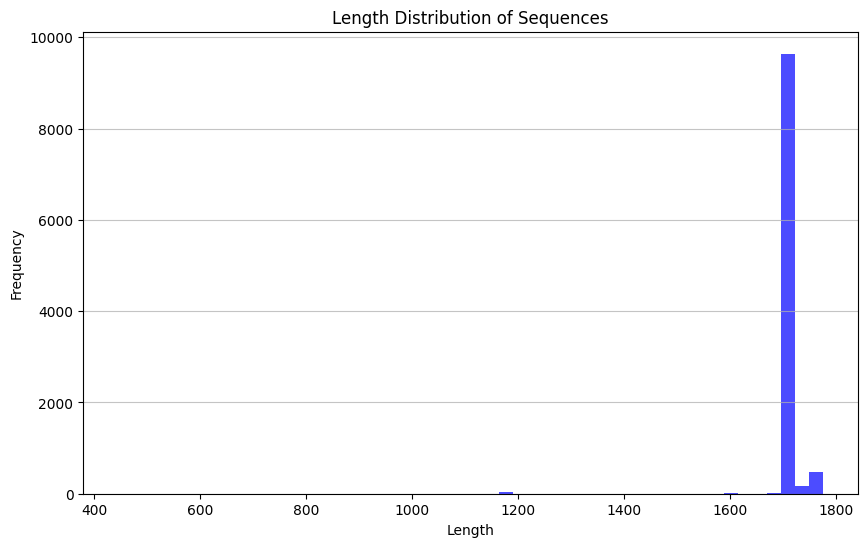

In [15]:
# plot length distribution of the sequences in the filtered DataFrame
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Length'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Length Distribution of Sequences')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [16]:
# count length > 1700
length_gt_1700 = filtered_df[filtered_df['Length'] > 1700].shape[0]
print(f"Count of sequences with length > 1700: {length_gt_1700}")

Count of sequences with length > 1700: 10285
